# Imports

In [1]:
import matplotlib.pyplot as plt

from simulations_jit.SimulatedAnnealing import *
from simulations_jit.SimulatedAnnealingForces import *
from Analysis import *
import numpy as np

# Number of simulations

In [2]:
n_simulations = 20

# Getting best configurations for N=3, 5, 7, 9, 11, 12

In [43]:
# Parameters
N = [3, 5, 6, 7, 9, 11, 12]
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
alpha = 0.9
iter_num = 100

# Getting best configurations
positions = np.empty((1, 2))
energies = []
    
for i in range(len(N)):
    n = N[i]
    print("N = ", n)
    # Get results
    p, E = optimal_configuration(n, R, Temp_max, Temp_min, alpha, iter_num, 100, simulated_annealing)
    
    # Add to positions
    positions = np.concatenate([positions, p])
    
    # Add to energies
    energies.append(E)

# Remove first row of positions
positions = positions[1:, :]

# Save results
np.savetxt('res/configurations.txt', positions)
np.savetxt('res/energies.txt', energies)

N =  3
N =  5
N =  7
N =  9
N =  11


# Random vs Forced

In [67]:
Ns = [11, 20]
alpha = 0.9
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
iter_num = 100
methods = [simulated_annealing, simulated_annealing_forces]

results = []
for N in Ns:
    temp = []
    for method in methods:
        energies = []
        for sim in range(n_simulations):
            p, E = method(N, R, Temp_max, Temp_min, alpha, iter_num)
            energies.append(E)
    
        temp.append(energies)
    results.append(temp)



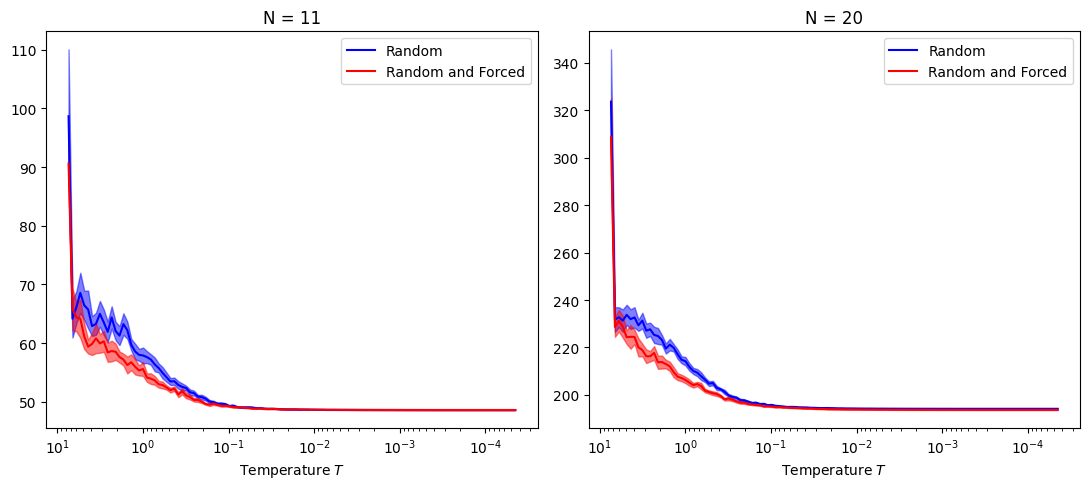

In [72]:
names = ['Random', 'Random and Forced']
colors = ['blue', 'red']
fig, ax = plt.subplots(1,2, figsize=(11,5))
for i, res in enumerate(results):
    for j, energies in enumerate(res):
        # To array
        energies = np.array(energies)
        
        # Get mean and confidence interval
        E_mean = np.mean(energies, axis=0)
        E_conf = (np.std(energies, axis=0) * 1.96 / np.sqrt(n_simulations))
    
    
        Ts = get_T_history(Temp_max, Temp_min, alpha)
    
        ax[i].semilogx(Ts, E_mean, label=names[j], color=colors[j])
        ax[i].fill_between(Ts, E_mean-E_conf, E_mean+E_conf, alpha=0.5, color=colors[j])
    ax[i].invert_xaxis()
    ax[i].legend()
    ax[i].set_xlabel('Temperature $T$')
    ax[i].set_ylabel('')
    ax[i].set_title(f'N = {Ns[i]}')
fig.tight_layout()
fig.savefig('res/Random vs Forced.png', dpi=300)

# Vary iterations

In [64]:
N = 11
alpha = 0.9
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
iters = [1, 5, 100]
methods = [simulated_annealing, simulated_annealing_forces]

results = []
for method in methods:
    temp = []
    for iter_num in iters:
        energies = []
        for sim in range(n_simulations):
            p, E = method(N, R, Temp_max, Temp_min, alpha, iter_num)
            energies.append(E)

        temp.append(energies)
    results.append(temp)



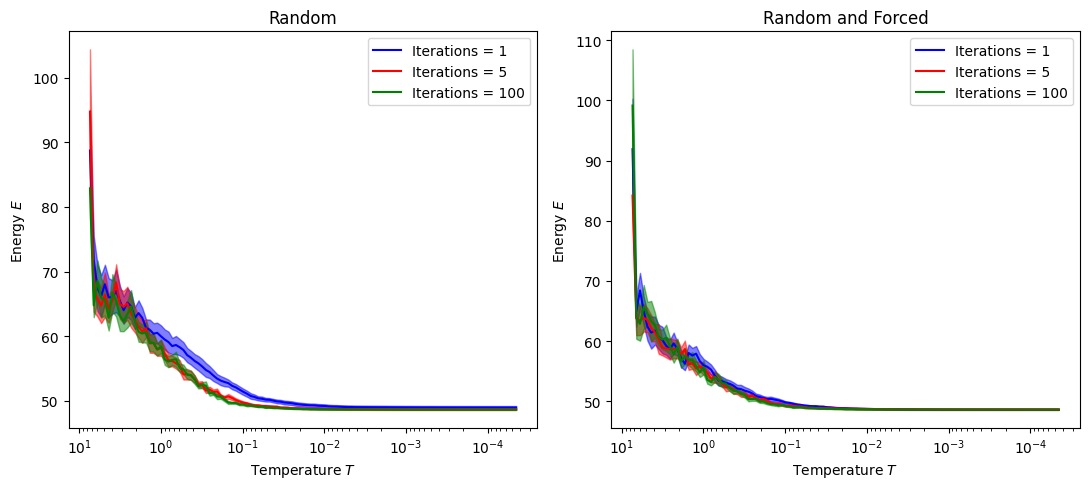

In [66]:
names = ['Random', 'Random and Forced']
colors = ['blue', 'red', 'green']
fig, ax = plt.subplots(1,2, figsize=(11,5))
for i, res in enumerate(results):
    for j, energies in enumerate(res):
        # To array
        energies = np.array(energies)

        # Get mean and confidence interval
        E_mean = np.mean(energies, axis=0)
        E_conf = (np.std(energies, axis=0) * 1.96 / np.sqrt(n_simulations))


        Ts = get_T_history(Temp_max, Temp_min, alpha)

        ax[i].semilogx(Ts, E_mean, label=f'Iterations = {iters[j]}', color=colors[j])
        ax[i].fill_between(Ts, E_mean-E_conf, E_mean+E_conf, alpha=0.5, color=colors[j])
    ax[i].invert_xaxis()
    ax[i].legend()
    ax[i].set_xlabel('Temperature $T$')
    ax[i].set_ylabel('Energy $E$')
    ax[i].set_title(f'{names[i]}')
    
fig.tight_layout()
fig.savefig('res/MarkovChangeDiff.png', dpi=300)

# Finding magic numbers with only random perturbations

In [4]:
# Parameters
N_begin = 24
N_end = 49
Ns = np.arange(N_begin, N_end)
iter_num = 100
R = 1
Temp_max = np.exp(2)
Temp_min = np.exp(-10)
alpha = 0.9

# Positions
positions = multi_simulate_particle(Ns, 1, Temp_max, Temp_min, alpha, iter_num, simulated_annealing)

# Sort positions
lengths = [len(positions[i]) for i in range(len(positions))]
sorted_positions = [x for _, x in sorted(zip(lengths, positions))]

# To one array
positions = np.vstack(sorted_positions)

# Save results
np.savetxt('res/configurations_bigN.txt', positions)
    

In [15]:
# Range for magic numbers
Ns = np.arange(25, 30)

# Number of simulations
n_sims = 10

positions = []

for N in Ns:
    p, E = optimal_configuration(N, 1, Temp_max, Temp_min, alpha, iter_num, n_sims, simulated_annealing)
    positions.append(p)

positions = np.vstack(positions)

# Save results
np.savetxt('res/configurations_bigN2.txt', positions)

In [37]:
# Range for magic numbers
Ns = [29, 30]

# Number of simulations
n_sims = 50

positions = []

for N in Ns:
    p, E = optimal_configuration(N, 1, Temp_max, Temp_min, alpha, iter_num, n_sims, simulated_annealing)
    positions.append(p)

positions = np.vstack(positions)

# Save results
np.savetxt('res/configurations_bigN3.txt', positions)

# Finding magic number with random and forced perturbations

In [38]:
# Range for magic numbers
Ns = [29, 30]

# Number of simulations
n_sims = 50

positions = []

for N in Ns:
    p, E = optimal_configuration(N, 1, Temp_max, Temp_min, alpha, iter_num, n_sims, simulated_annealing_forces)
    positions.append(p)

positions = np.vstack(positions)

# Save results
np.savetxt('res/configurations_bigN3_forces.txt', positions)